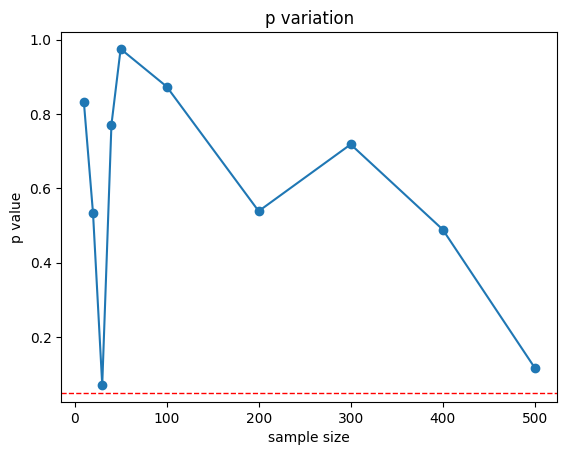

In [1]:
# 자료수집 중단 시점 결정

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 데이터 수집 예시
np.random.seed(42)
data = np.random.normal(0, 1, 1000)
sample_sizes = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500]
p_values = []

for size in sample_sizes:
    sample = np.random.choice(data, size)
    _, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)

# p-값 시각화
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(y=0.05, color='red', linestyle='dashed', linewidth=1)
plt.title('p variation')
plt.xlabel('sample size')
plt.ylabel('p value')
plt.show()

In [2]:
# 데이터 탐색과 검증 분리

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 분할 (탐색용 80%, 검증용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 탐색용 데이터로 예측
y_train_pred = model.predict(X_train)

# 검증용 데이터로 예측
y_test_pred = model.predict(X_test)

# 탐색용 데이터 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'탐색용 데이터 - MSE: {train_mse}, R2: {train_r2}')

# 검증용 데이터 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'검증용 데이터 - MSE: {test_mse}, R2: {test_r2}')

탐색용 데이터 - MSE: 0.8476788564209705, R2: 0.7582381034538057
검증용 데이터 - MSE: 0.6536995137170016, R2: 0.8072059636181393
